In [1]:
import pandas as pd
pd.set_option('display.max_column',30)
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import math
import copy as cp
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams ##matplotlib
rcParams['figure.figsize'] = 12, 8

In [3]:
train = pd.read_csv('../../new_data/train.csv')
train_target = pd.read_csv('../../new_data/train_target.csv')
train = train.merge(train_target,on='id')
test = pd.read_csv('../../new_data/test.csv')

/home/zsy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


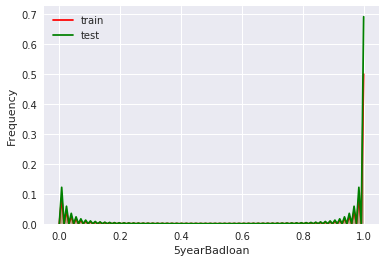

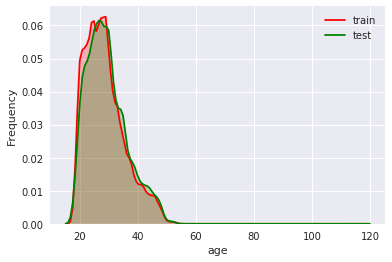

/home/zsy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/zsy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


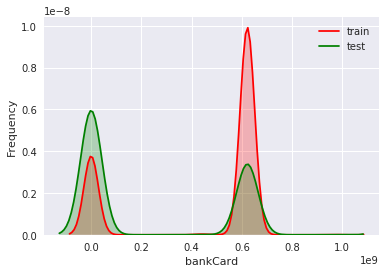

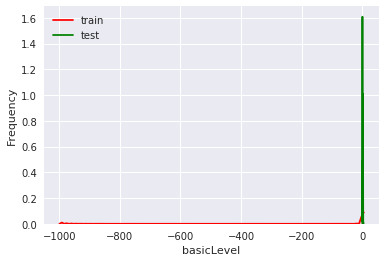

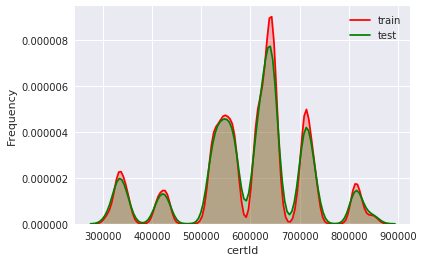

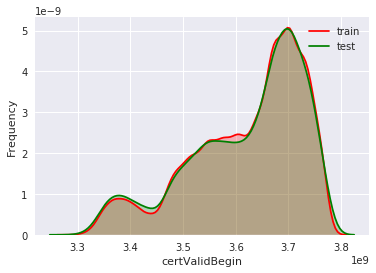

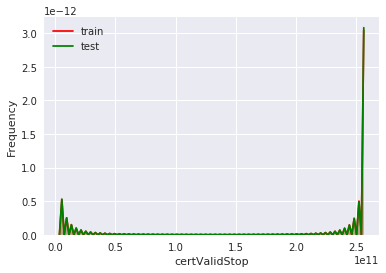

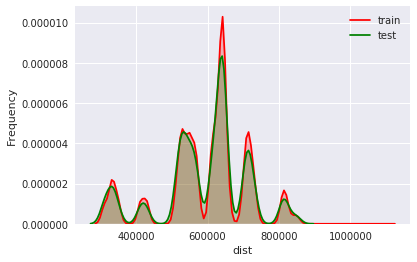

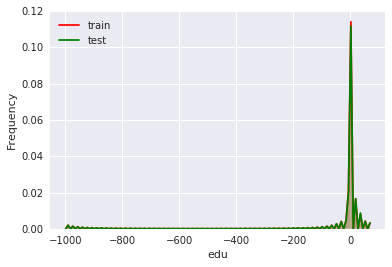

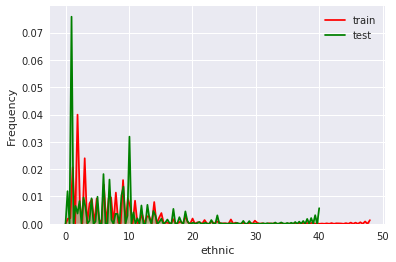

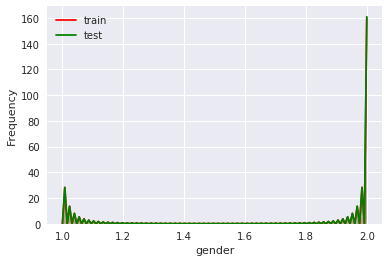

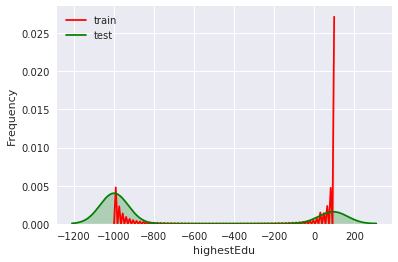

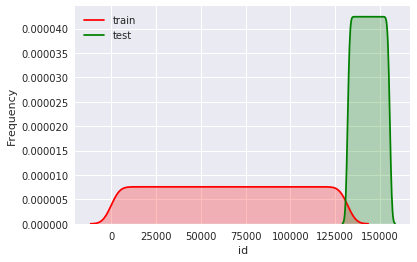

/home/zsy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/zsy/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


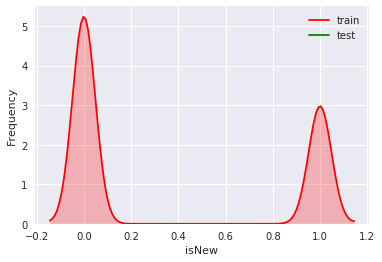

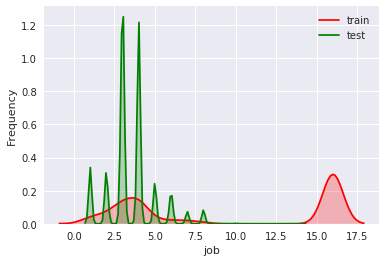

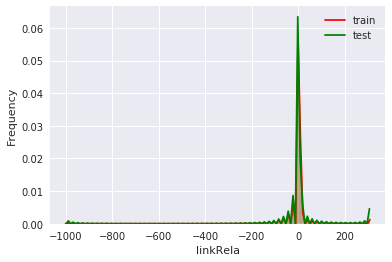

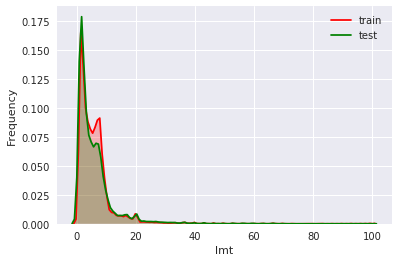

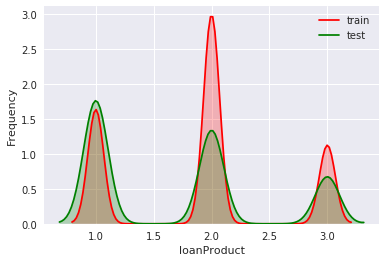

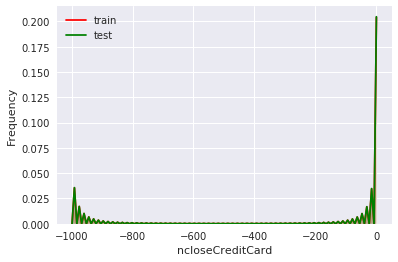

ValueError: could not convert string to float: 'train'

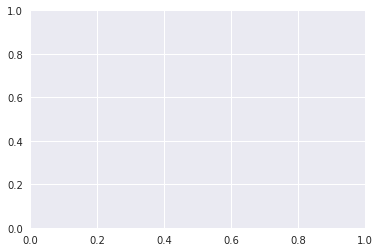

In [4]:
#特征分布
train["oringin"]="train"
test["oringin"]="test"
data=pd.concat([train,test],axis=0,ignore_index=True)
#View data

# Explore feature distibution 
#fig = plt.figure(figsize=(6, 6))
for column in data.columns[0:-1]:
    g = sns.kdeplot(data[column][(data["oringin"] == "train")], color="Red", shade = True)
    g = sns.kdeplot(data[column][(data["oringin"] == "test")], ax =g, color="Green", shade= True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    g = g.legend(["train","test"])
    plt.show()

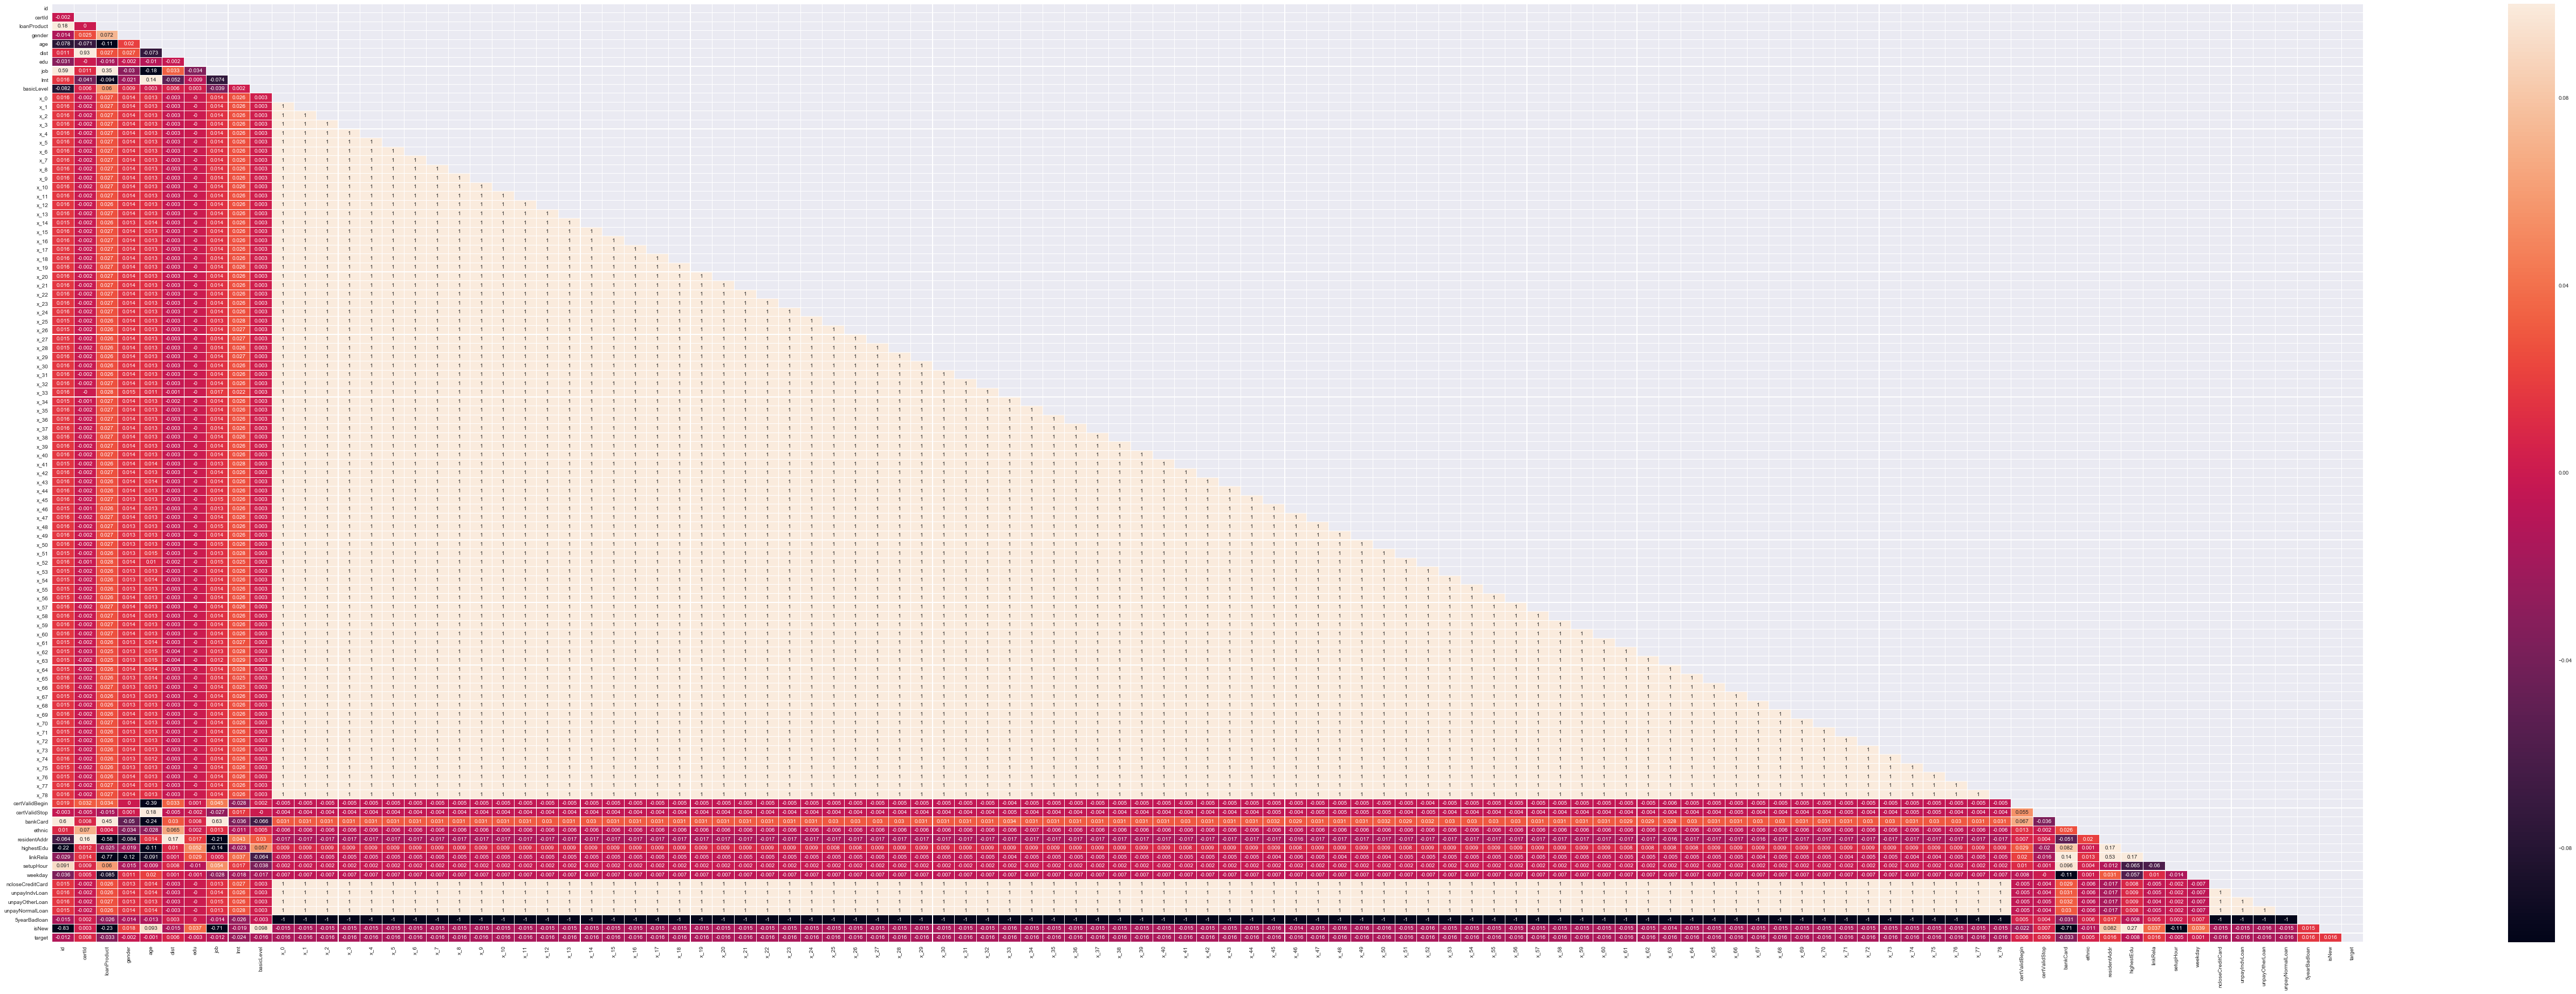

In [6]:
#相关性判定
plt.figure(figsize=(96,32))
correlation = train.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=correlation.round(3),mask=mask,vmin=-0.1,vmax=0.1,annot=True, linewidths=.1)